## STAT 4185 Final Project

Process:
- Data Collection: load dataset
- Data Preprocessing: cleaning and splitting with Pandas, scaling
- Data Visualizations with matplotlib and seaborn (will come back to this)
- Data Analysis
- Model Construction: decision tree/random forest/adaboost
- Model Assessment: predictive performance analysis
- Conclusion

References:
- https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data
- https://www.mdpi.com/2306-5729/7/11/146

### Data Collection
#### load dataset

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [129]:
df = pd.read_csv("dataset.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Data Preprocessing
#### Cleaning with Pandas

In [130]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

All of the qualitative variables appear to have been quantitatively encoded. I had to dig around to find the key that describes qualitative labels to their respective integers. In the process, I had stumbled on the original paper which explores the data. This project will contribute potential improvements to their process.

In [131]:
df.isna().sum()
# no NA/null values were found!
# Object type should indicate this since all values are int64/float64


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [132]:
for i in df.columns:
    print(i,df[i].unique())
# check qualitative attributes 

Marital status [1 2 4 3 5 6]
Application mode [ 8  6  1 12  9 17 15 16 14  4 13  7  3  2  5 18 10 11]
Application order [5 1 2 4 3 6 9 0]
Course [ 2 11  5 15  3 17 12 10 14 16  6  8 13  9  4  1  7]
Daytime/evening attendance [1 0]
Previous qualification [ 1 12 16 14  8  3 15  2  4  9 17 11  6  7 13  5 10]
Nacionality [ 1 15  3 14 12 18  5 11  8 17  4  9 13 16 10 21  2 20 19  6  7]
Mother's qualification [13  1 22 23  3  4 27  2 19 10 25  7  5 24  9 26 18 11 20 21  6  8 17 28
 12 14 16 15 29]
Father's qualification [10  3 27 28  1 14  5  4 24  2 29  9  7 26 18 30 12 15 25 31 16 11 20 33
 13 32  8  6 21 17 34 23 19 22]
Mother's occupation [ 6  4 10  8  5  2 16  1  7  3 12  9 20 28 13 29 23 32 30 18 24 19 11 21
 15 27 31 14 22 17 26 25]
Father's occupation [10  4  8 11  6  9  5  2  3 22  7  1 12 39 19 13 29 46 43 34 44 30 41 24
 23 45 35 26 28 36 16 37 31 42 20 15 40 25 21 17 32 38 27 18 14 33]
Displaced [1 0]
Educational special needs [0 1]
Debtor [0 1]
Tuition fees up to date [1 0]
Gend

Cleaning is pretty much set, although in an ideal world, the variables need to be reencoded since qualitative variables with numeric discrete encoding implies ordinality, particularly when there are more than two values for a variable. This could be a problem for interpretability; for example the course ``agronomy`` associated with the integer encoding of 4 has no purpose to be valued more than course ``Biofuel Production Technologies`` which is associated with the integer encoding of 1. 

I am attempting to reencode with one-hot encoding since this is the best method to use with unordered labels within a category. Dropping attributes associated with student parents for simplicity.

In [133]:
parents = ["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
df1 = df.drop(parents, axis=1)

In [134]:
df1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Displaced,Educational special needs,Debtor,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,1,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,0,0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,1,0,0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,1,0,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,0,0,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [135]:
mcatvars = ['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nacionality']

In [136]:
df2 = pd.get_dummies(df1, columns=mcatvars)
df2.head()

,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,...,Nacionality_12,Nacionality_13,Nacionality_14,Nacionality_15,Nacionality_16,Nacionality_17,Nacionality_18,Nacionality_19,Nacionality_20,Nacionality_21
0,5,1,1,0,0,1,1,0,20,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,0,19,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,1,0,0,0,1,0,19,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,0,1,0,0,20,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,45,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
list(df2.columns)

['Application order',
 'Daytime/evening attendance',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target',
 'Marital status_1',
 'Marital status_2',
 'Marital status_3',
 'Marital status_4',
 'Marital status_5',
 'Marital status_6',
 'Application mode_1',
 'Application mode_2',
 'Application mode_3',
 'Application mode_4',
 'Applicat

#### Splitting Data

In [138]:
target_list = ["Target"] # this was initially a list with multiple elements where Target was one-hot encoded

In [139]:
list(df2.columns)

['Application order',
 'Daytime/evening attendance',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',
 'Target',
 'Marital status_1',
 'Marital status_2',
 'Marital status_3',
 'Marital status_4',
 'Marital status_5',
 'Marital status_6',
 'Application mode_1',
 'Application mode_2',
 'Application mode_3',
 'Application mode_4',
 'Applicat

In [140]:
X = df2[list(set(df2.columns)-set(target_list))]
X = df2[[item for item in df2.columns if item not in target_list]]

In [141]:
X.head()

,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,...,Nacionality_12,Nacionality_13,Nacionality_14,Nacionality_15,Nacionality_16,Nacionality_17,Nacionality_18,Nacionality_19,Nacionality_20,Nacionality_21
0,5,1,1,0,0,1,1,0,20,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,0,19,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,1,0,0,0,1,0,19,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,0,1,0,0,20,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,45,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
y = df2[target_list]
y.head()

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


In [150]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
# using 25% of data as test since this is relatively smaller

In [151]:
# saving unscaled sets for later (visualization)
X_train1 = X_train[:]
y_train1 = y_train[:]

In [159]:
columns_to_scale = list(df.columns.drop(mcatvars).drop(parents).drop(target_list))
columns_no_scale = [col for col in X_train.columns if col not in columns_to_scale]

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('no_scaler', 'passthrough', columns_no_scale)
    ]
)

In [160]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [161]:
X_train = pd.DataFrame(X_train, columns=columns_to_scale + columns_no_scale)
X_test = pd.DataFrame(X_test, columns=columns_to_scale + columns_no_scale)

In [183]:
X_train

,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,...,Nacionality_12,Nacionality_13,Nacionality_14,Nacionality_15,Nacionality_16,Nacionality_17,Nacionality_18,Nacionality_19,Nacionality_20,Nacionality_21
0,3.278361,0.346683,-1.098234,-0.109059,-0.356424,0.368663,1.360337,-0.579902,-0.559454,-0.154137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.210575,0.346683,0.910553,-0.109059,-0.356424,0.368663,-0.735112,1.724428,-0.559454,-0.154137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.977522,0.346683,0.910553,9.169347,-0.356424,0.368663,-0.735112,1.724428,-0.691114,-0.154137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.556371,0.346683,-1.098234,-0.109059,-0.356424,0.368663,-0.735112,-0.579902,0.625482,-0.154137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.556371,0.346683,-1.098234,-0.109059,-0.356424,-2.712505,-0.735112,-0.579902,1.810419,-0.154137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,-0.556371,0.346683,0.910553,-0.109059,-0.356424,0.368663,1.360337,-0.579902,-0.559454,-0.154137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3314,3.278361,0.346683,0.910553,-0.109059,-0.356424,0.368663,-0.735112,-0.579902,-0.559454,-0.154137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3315,-0.556371,0.346683,0.910553,-0.109059,-0.356424,0.368663,1.360337,1.724428,-0.296135,-0.154137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3316,-0.556371,0.346683,-1.098234,-0.109059,-0.356424,0.368663,-0.735112,-0.579902,-0.427795,-0.154137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Visualization

We can use data visualizations to see features of our data 

In [163]:
# combined_train = pd.concat([X_train, y_train], axis=1)
combined_train = X_train1.join(y_train1)

In [182]:
combined_train.head()

,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,...,Nacionality_13,Nacionality_14,Nacionality_15,Nacionality_16,Nacionality_17,Nacionality_18,Nacionality_19,Nacionality_20,Nacionality_21,Target
4419,6,1,0,0,0,1,1,0,19,0,...,0,0,0,0,0,0,0,0,0,Graduate
1003,2,1,1,0,0,1,0,1,19,0,...,0,0,0,0,0,0,0,0,0,Graduate
1252,3,1,1,1,0,1,0,1,18,0,...,0,0,0,0,0,0,0,0,0,Graduate
936,1,1,0,0,0,1,0,0,28,0,...,0,0,0,0,0,0,0,0,0,Dropout
1548,1,1,0,0,0,0,0,0,37,0,...,0,0,0,0,0,0,0,0,0,Dropout


In [165]:
y_train1.head()

,Target
4419,Graduate
1003,Graduate
1252,Graduate
936,Dropout
1548,Dropout


In [222]:
# grouping columns for easier analysis

combined_train.columns
first_sem = (combined_train.columns[10:16])
second_sem = (combined_train.columns[16:22])
marital_stat = (combined_train.columns[25:31])
app_mode = (combined_train.columns[-74:-56])
course = (combined_train.columns[-56:-39])
prev_qual = (combined_train.columns[-39:-22])
nacionality = (combined_train.columns[-22:-1])


In [257]:
combined_train['Application order'].value_counts()

1    2265
2     413
3     233
4     194
5     116
6      95
9       1
0       1
Name: Application order, dtype: int64

In [271]:
df['Marital status'].value_counts().sort_index()

1    3919
2     379
3       4
4      91
5      25
6       6
Name: Marital status, dtype: int64

In [273]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

array([6, 2, 3, 1, 4, 5, 9, 0], dtype=int64)

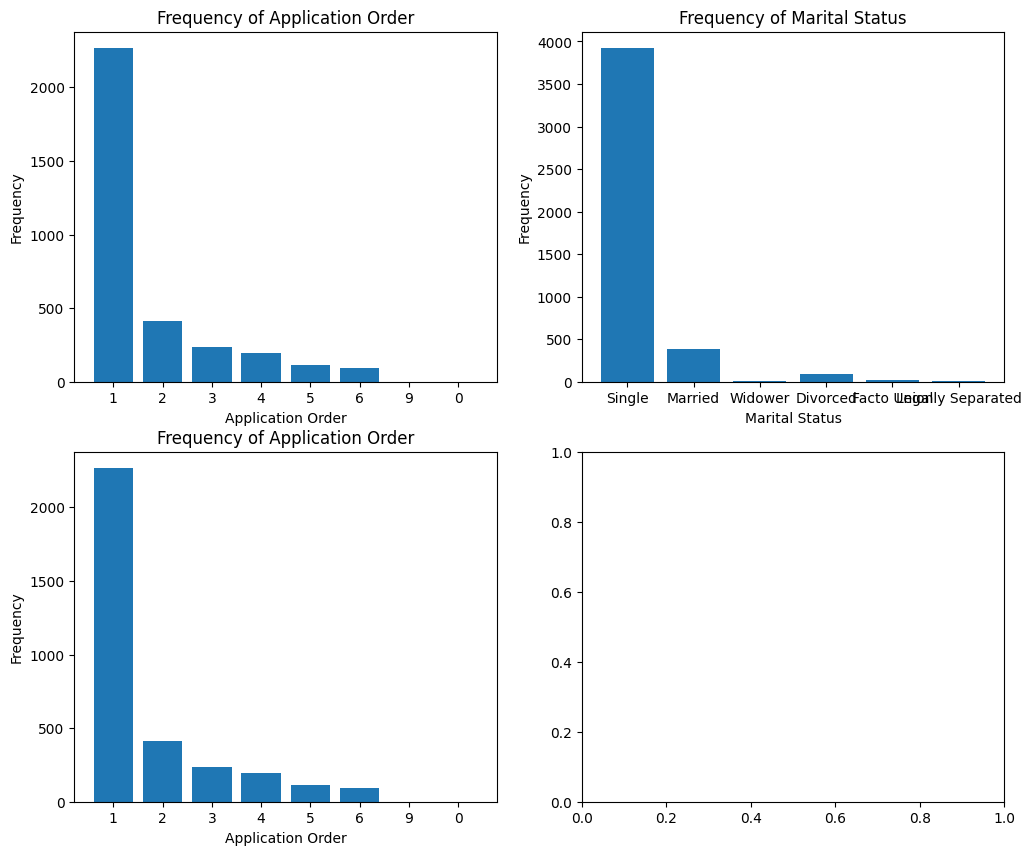

In [272]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (12, 10))


# barplot, used for categorical variables and their counts
axs[0,0].bar(['1', '2', '3', '4', '5', '6', '9', '0'], combined_train['Application order'].value_counts())
axs[0,0].set_xlabel("Application Order")
axs[0,0].set_ylabel("Frequency")
axs[0,0].set_title("Frequency of Application Order")

# barplot, used for categorical variables and their counts
axs[0,1].bar(['Single','Married','Widower','Divorced','Facto Union','Legally Separated'], df['Marital status'].value_counts().sort_index())
axs[0,1].set_xlabel("Marital Status")
axs[0,1].set_ylabel("Frequency")
axs[0,1].set_title("Frequency of Marital Status")

# barplot, used for categorical variables and their counts
axs[1,0].bar(['1', '2', '3', '4', '5', '6', '9', '0'], combined_train['Application order'].value_counts())
axs[1,0].set_xlabel("Application Order")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_title("Frequency of Application Order")

# histogram, used for continuous variables with counts

# axs[1,1].hist(np.random.randn(500))
# axs[1,1].set_xlabel("x label")
# axs[1,1].set_ylabel("y label")
# axs[1,1].set_title("histogram")
combined_train['Application order'].unique()

Text(0.5, 1.0, 'Frequency of Marital Status')

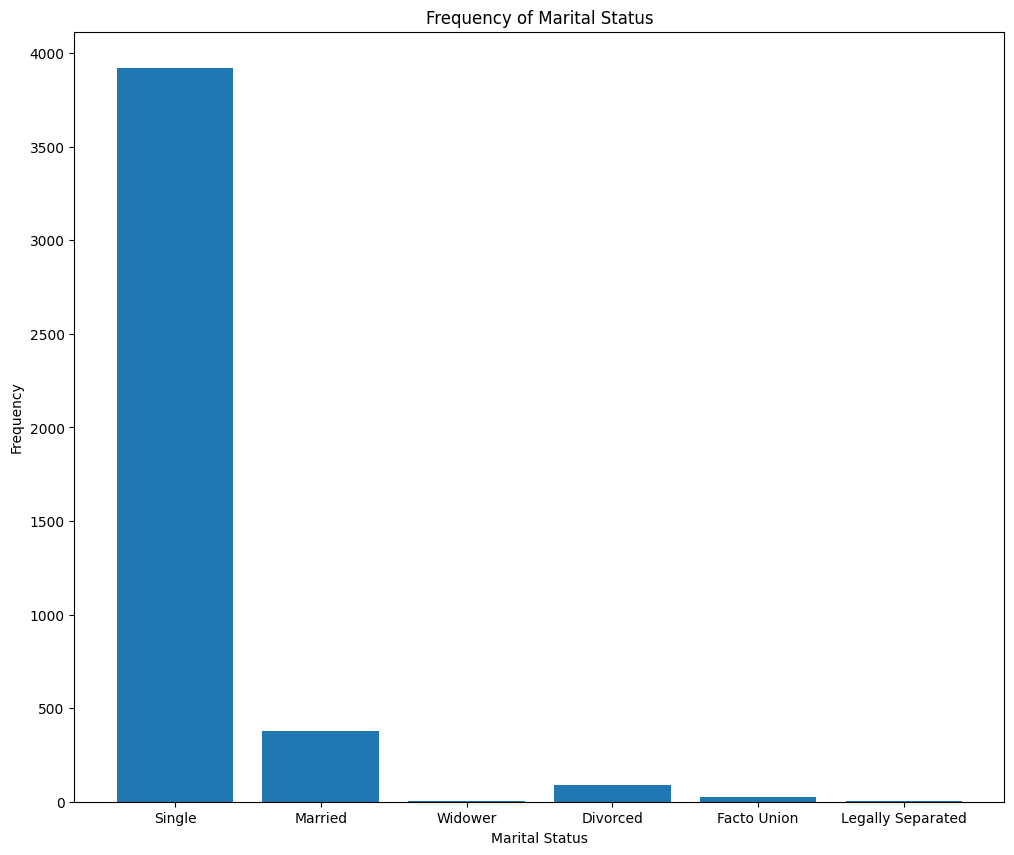

In [274]:
fig, axs = plt.subplots(figsize = (12, 10))
axs.bar(['Single','Married','Widower','Divorced','Facto Union','Legally Separated'], df['Marital status'].value_counts().sort_index())
axs.set_xlabel("Marital Status")
axs.set_ylabel("Frequency")
axs.set_title("Frequency of Marital Status")

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (12, 10))

axs[0,0].bar(['1', '2', '3', '4', '5', '6', '9', '0'], combined_train['Application order'].value_counts())
axs[0,0].set_xlabel("Application Order")
axs[0,0].set_ylabel("Frequency")
axs[0,0].set_title("Frequency of Application Order")


### Data Analysis


### Model Construction and Performance Evaluation
decision tree and random forest

In [176]:
np.random.seed(4185)

In [177]:
# Decision Tree model

treeee = DecisionTreeClassifier()
treeee.fit(X_train, y_train)

y_pred = treeee.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.66
Precision: 0.67
Recall: 0.66
F1 Score: 0.66


In [178]:
# Random Forest model

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

C:\Users\l3on7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1 Score: 0.75


### Conclusion